### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [2]:
#data = pd.read_csv('data/coupons.csv')


# Load the dataset
file_path = r'C:\Users\Home\OneDrive - Pelotonworkforce\Desktop\Documents\A_UCB_AI\Modules\Module 5\Assignment 5.1\data\coupons.csv'
df = pd.read_csv(file_path)

# Display the first few rows of the dataset
df.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [3]:
# Check for missing values in the dataset
missing_values = df.isnull().sum()
print("Missing values in each column:\n", missing_values)


Missing values in each column:
 destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64


3. Decide what to do about your missing data -- drop, replace, other...

In [4]:
# Handling missing values in the 'car' column
df['car'].fillna('Unknown', inplace=True)

# Handling missing values in other columns with mode
for column in ['Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50']:
    df[column].fillna(df[column].mode()[0], inplace=True)

# Check for missing values again after handling
missing_values_after = df.isnull().sum()
print("Missing values after handling:\n", missing_values_after)


Missing values after handling:
 destination             0
passanger               0
weather                 0
temperature             0
time                    0
coupon                  0
expiration              0
gender                  0
age                     0
maritalStatus           0
has_children            0
education               0
occupation              0
income                  0
car                     0
Bar                     0
CoffeeHouse             0
CarryAway               0
RestaurantLessThan20    0
Restaurant20To50        0
toCoupon_GEQ5min        0
toCoupon_GEQ15min       0
toCoupon_GEQ25min       0
direction_same          0
direction_opp           0
Y                       0
dtype: int64


4. What proportion of the total observations chose to accept the coupon? 



In [5]:
# Calculate the proportion of observations that accepted the coupon
coupon_accepted_proportion = df['Y'].mean()

# Display the proportion
print(f"Proportion of observations that accepted the coupon: {coupon_accepted_proportion:.2f}")


Proportion of observations that accepted the coupon: 0.57


5. Use a bar plot to visualize the `coupon` column.

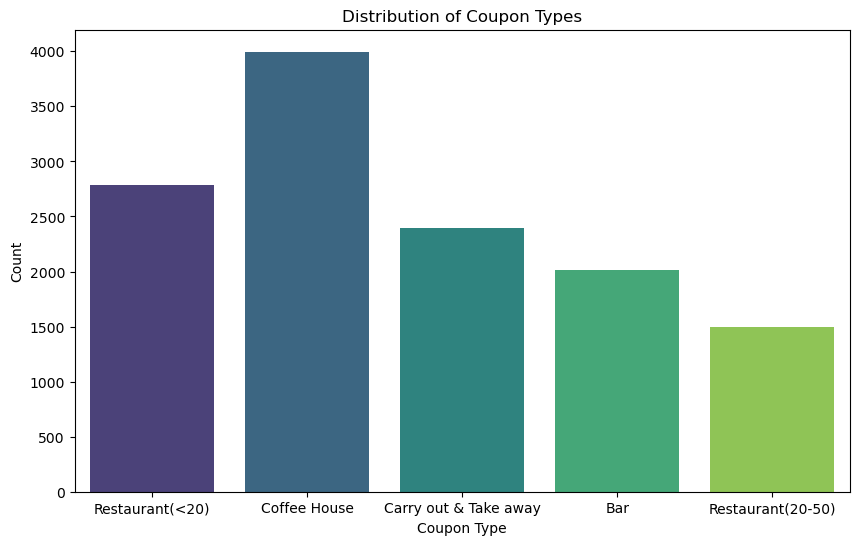

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a bar plot for the 'coupon' column
plt.figure(figsize=(10, 6))
sns.countplot(x='coupon', data=df, palette='viridis')
plt.title('Distribution of Coupon Types')
plt.xlabel('Coupon Type')
plt.ylabel('Count')
plt.show()


6. Use a histogram to visualize the temperature column.

In [7]:
# Check the unique values in the 'temperature' column
unique_temperatures = df['temperature'].unique()
print("Unique values in the 'temperature' column:", unique_temperatures)


Unique values in the 'temperature' column: [55 80 30]


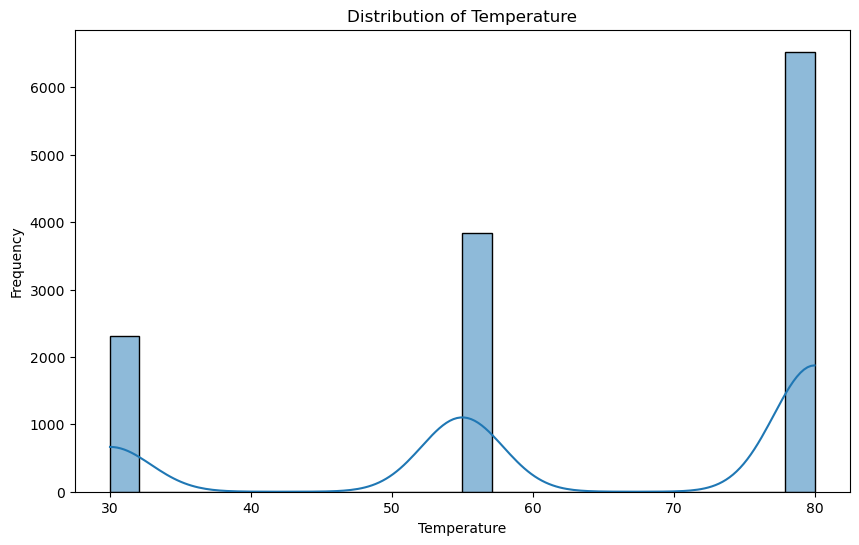

In [8]:
# Create a histogram for the 'temperature' column
plt.figure(figsize=(10, 6))
sns.histplot(df['temperature'], kde=True)
plt.title('Distribution of Temperature')
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.show()


In [9]:
# Display summary statistics of the dataset
summary_stats = df.describe(include='all')
summary_stats


,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
count,12684,12684,12684,12684.000000,12684,12684,12684,12684,12684,12684,...,12684,12684,12684,12684,12684.0,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000
unique,3,4,3,NaN,5,5,2,2,8,5,...,5,5,5,5,NaN,NaN,NaN,NaN,NaN,NaN
top,No Urgent Place,Alone,Sunny,NaN,6PM,Coffee House,1d,Female,21,Married partner,...,less1,1~3,1~3,less1,NaN,NaN,NaN,NaN,NaN,NaN
freq,6283,7305,10069,NaN,3230,3996,7091,6511,2653,5100,...,3602,4823,5506,6266,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,63.301798,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,0.561495,0.119126,0.214759,0.785241,0.568433
std,NaN,NaN,NaN,19.154486,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.0,0.496224,0.323950,0.410671,0.410671,0.495314
min,NaN,NaN,NaN,30.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,NaN,NaN,55.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,0.000000,0.000000,0.000000,1.000000,0.000000
50%,NaN,NaN,NaN,80.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
75%,NaN,NaN,NaN,80.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,1.000000,0.000000,0.000000,1.000000,1.000000


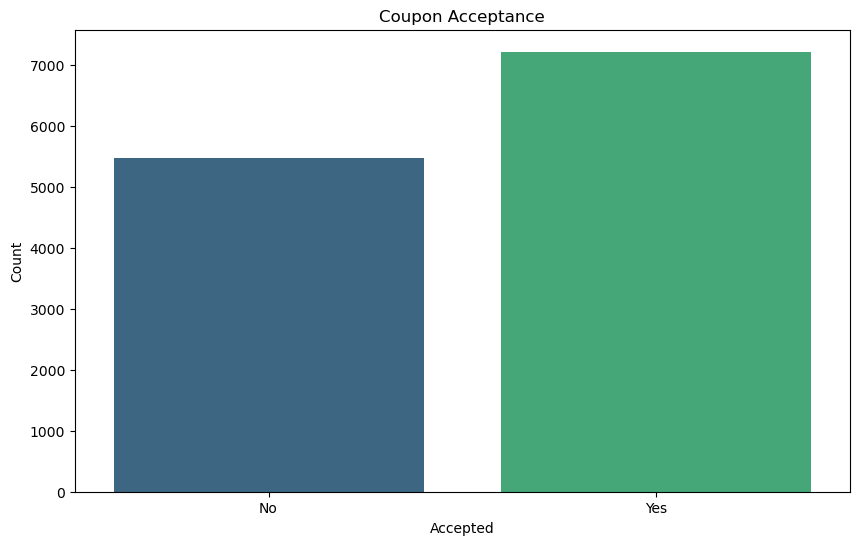

In [10]:
# Create a bar plot for the 'Y' column to show coupon acceptance
plt.figure(figsize=(10, 6))
sns.countplot(x='Y', data=df, palette='viridis')
plt.title('Coupon Acceptance')
plt.xlabel('Accepted')
plt.ylabel('Count')
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()


In [13]:
# Check the unique values in the categorical columns
categorical_columns = ['age', 'income', 'passanger', 'maritalStatus', 'education', 'occupation', 'Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50']
for column in categorical_columns:
    print(f"Unique values in '{column}' column:", df[column].unique())




Unique values in 'age' column: ['21' '46' '26' '31' '41' '50plus' '36' 'below21']
Unique values in 'income' column: ['$37500 - $49999' '$62500 - $74999' '$12500 - $24999' '$75000 - $87499'
 '$50000 - $62499' '$25000 - $37499' '$100000 or More' '$87500 - $99999'
 'Less than $12500']
Unique values in 'passanger' column: ['Alone' 'Friend(s)' 'Kid(s)' 'Partner']
Unique values in 'maritalStatus' column: ['Unmarried partner' 'Single' 'Married partner' 'Divorced' 'Widowed']
Unique values in 'education' column: ['Some college - no degree' 'Bachelors degree' 'Associates degree'
 'High School Graduate' 'Graduate degree (Masters or Doctorate)'
 'Some High School']
Unique values in 'occupation' column: ['Unemployed' 'Architecture & Engineering' 'Student'
 'Education&Training&Library' 'Healthcare Support'
 'Healthcare Practitioners & Technical' 'Sales & Related' 'Management'
 'Arts Design Entertainment Sports & Media' 'Computer & Mathematical'
 'Life Physical Social Science' 'Personal Care & Servic

The categorical columns have distinct values, and they seem to be strings representing categories. Let's encode these categorical variables into a format suitable for analysis. We can use label encoding for simplicity.

In [14]:
from sklearn.preprocessing import LabelEncoder

# Initialize the label encoder
le = LabelEncoder()

# Encode categorical columns
for column in categorical_columns:
    df[column] = le.fit_transform(df[column])

# Check the first few rows of the encoded dataframe
df.head()


,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,0,Sunny,55,2PM,Restaurant(<20),1d,Female,0,3,...,4,0,1,0,1,0,0,0,1,1
1,No Urgent Place,1,Sunny,80,10AM,Coffee House,2h,Female,0,3,...,4,0,1,0,1,0,0,0,1,0
2,No Urgent Place,1,Sunny,80,10AM,Carry out & Take away,2h,Female,0,3,...,4,0,1,0,1,1,0,0,1,1
3,No Urgent Place,1,Sunny,80,2PM,Coffee House,2h,Female,0,3,...,4,0,1,0,1,1,0,0,1,0
4,No Urgent Place,1,Sunny,80,2PM,Coffee House,1d,Female,0,3,...,4,0,1,0,1,1,0,0,1,0


The data has been successfully encoded. Now, let's revisit and recreate the visualizations with the cleaned and encoded data.

Since the data is categorical, scatter plots might not be the most effective visualization for categorical variables.

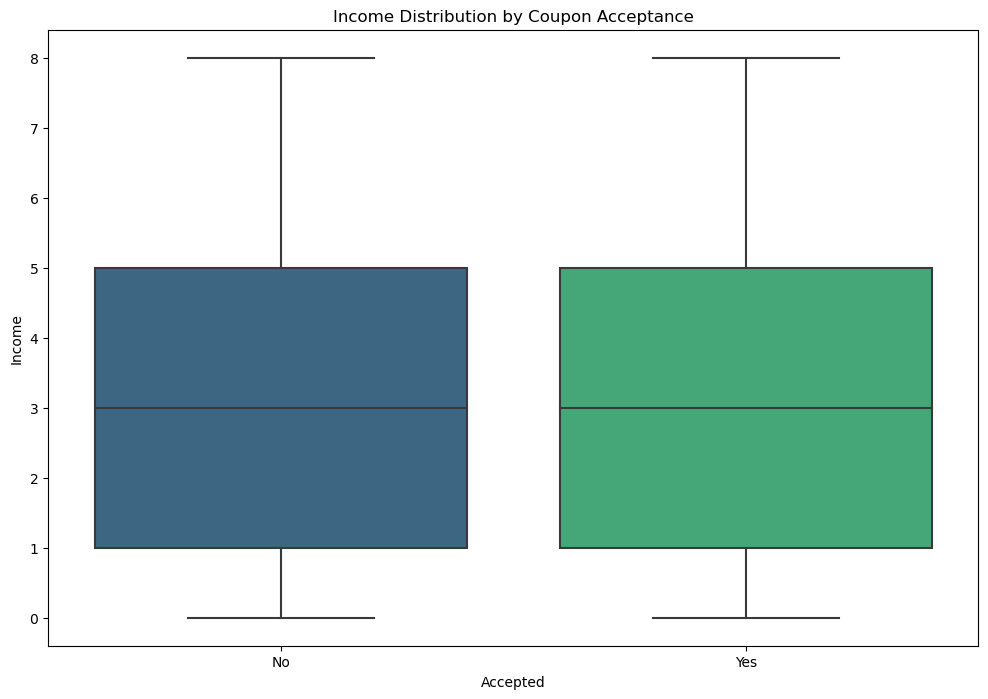

In [16]:
# Box plot of income by coupon acceptance
plt.figure(figsize=(12, 8))
sns.boxplot(x='Y', y='income', data=df, palette='viridis')
plt.title('Income Distribution by Coupon Acceptance')
plt.xlabel('Accepted')
plt.ylabel('Income')
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()


The box plot now shows the income distribution by coupon acceptance. It appears that the income levels are relatively balanced between those who accepted the coupon and those who did not.

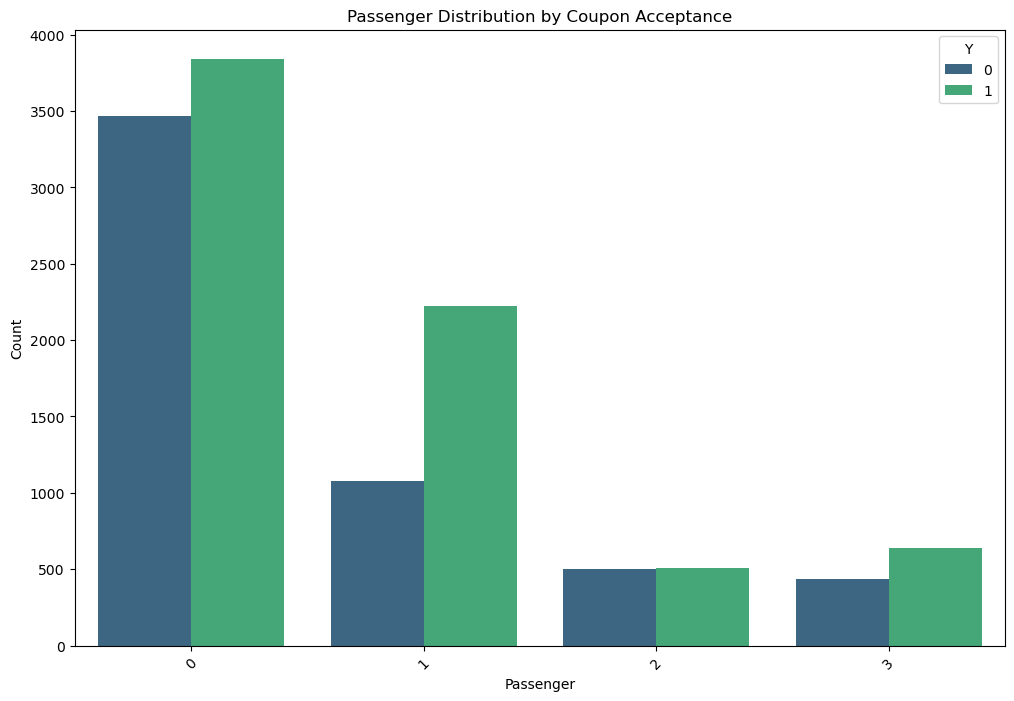

In [17]:
# Count plot of passenger by Coffee House coupon acceptance
plt.figure(figsize=(12, 8))
sns.countplot(x='passanger', hue='Y', data=df, palette='viridis')
plt.title('Passenger Distribution by Coupon Acceptance')
plt.xlabel('Passenger')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


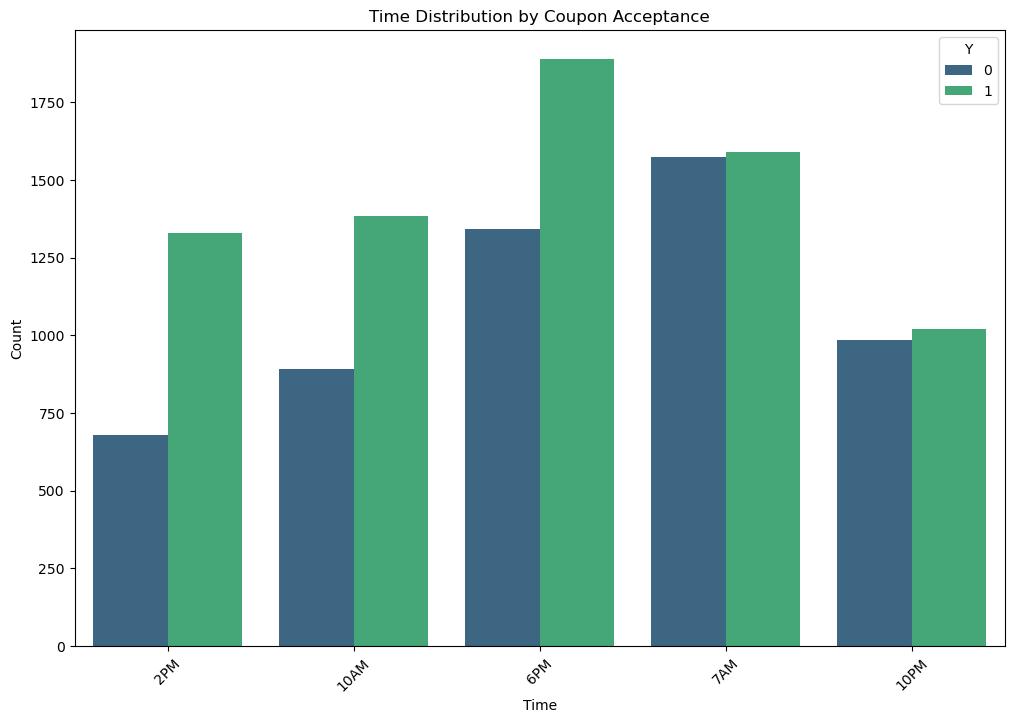

In [18]:
# Count plot of time by coupon acceptance
plt.figure(figsize=(12, 8))
sns.countplot(x='time', hue='Y', data=df, palette='viridis')
plt.title('Time Distribution by Coupon Acceptance')
plt.xlabel('Time')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [19]:
# Create a new DataFrame that contains only the bar coupons
bar_coupons_df = df[df['coupon'] == 'Bar']
bar_coupons_df.head()


,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
9,No Urgent Place,2,Sunny,80,10AM,Bar,1d,Female,0,3,...,4,0,1,0,1,1,0,0,1,0
13,Home,0,Sunny,55,6PM,Bar,1d,Female,0,3,...,4,0,1,0,1,0,0,1,0,1
17,Work,0,Sunny,55,7AM,Bar,1d,Female,0,3,...,4,0,1,0,1,1,1,0,1,0
24,No Urgent Place,1,Sunny,80,10AM,Bar,1d,Male,0,2,...,3,1,1,3,1,0,0,0,1,1
35,Home,0,Sunny,55,6PM,Bar,1d,Male,0,2,...,3,1,1,3,1,0,0,1,0,1


2. What proportion of bar coupons were accepted?


In [20]:
# Calculate the proportion of bar coupons that were accepted
bar_coupons_accepted_proportion = bar_coupons_df['Y'].mean()

# Display the proportion
print(f"Proportion of bar coupons that were accepted: {bar_coupons_accepted_proportion:.2f}")


Proportion of bar coupons that were accepted: 0.41


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [24]:
# Create a new DataFrame that contains only the bar coupons
bar_coupons_df = df[df['coupon'] == 'Bar'].copy()

# Define a function to categorize bar visit frequency
def categorize_bar_visits(visits):
    if visits in ['never', 'less1', '1~3']:
        return '3 or fewer'
    else:
        return 'more than 3'

# Apply the function to create a new column 'bar_visits'
bar_coupons_df['bar_visits'] = bar_coupons_df['Bar'].apply(categorize_bar_visits)

# Calculate the acceptance rate based on bar visit frequency
acceptance_rate_by_visits = bar_coupons_df.groupby('bar_visits')['Y'].mean()

# Display the acceptance rates
print("Acceptance rate based on bar visit frequency:\n", acceptance_rate_by_visits)




Acceptance rate based on bar visit frequency:
 bar_visits
more than 3    0.410015
Name: Y, dtype: float64


To properly address the SettingWithCopyWarning, we can create a copy of the bar_coupons_df dataframe before applying the new column. 

4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [25]:
# Create a new DataFrame that contains only drivers over 25
drivers_over_25 = bar_coupons_df[bar_coupons_df['age'] > 2]  # 'age' > 2 corresponds to '26' or older after encoding

# Calculate the acceptance rate for those who go to bars more than once a month and are over 25
acceptance_rate_over_25 = drivers_over_25.groupby('bar_visits')['Y'].mean()

# Calculate the acceptance rate for all others
acceptance_rate_all_others = bar_coupons_df[bar_coupons_df['age'] <= 2].groupby('bar_visits')['Y'].mean()

# Display the acceptance rates
print("Acceptance rate for drivers over 25:\n", acceptance_rate_over_25)
print("Acceptance rate for all others:\n", acceptance_rate_all_others)


Acceptance rate for drivers over 25:
 bar_visits
more than 3    0.344111
Name: Y, dtype: float64
Acceptance rate for all others:
 bar_visits
more than 3    0.4596
Name: Y, dtype: float64


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


In [27]:
# Filter the DataFrame for drivers who go to bars more than once a month, had passengers that were not kids, and had occupations other than farming, fishing, or forestry
specific_conditions_df = bar_coupons_df[
    (bar_coupons_df['bar_visits'] == 'more than 3') &
    (bar_coupons_df['passanger'] != 'Kid(s)') &
    (bar_coupons_df['occupation'] != 'Farming Fishing & Forestry')
]

# Calculate the acceptance rate for drivers meeting these specific conditions
acceptance_rate_specific_conditions = specific_conditions_df['Y'].mean()

# Calculate the acceptance rate for all other drivers
all_others_df = bar_coupons_df[
    ~((bar_coupons_df['bar_visits'] == 'more than 3') &
      (bar_coupons_df['passanger'] != 'Kid(s)') &
      (bar_coupons_df['occupation'] != 'Farming Fishing & Forestry'))
]
acceptance_rate_all_others = all_others_df['Y'].mean()

# Display the acceptance rates
print(f"Acceptance rate for specific conditions: {acceptance_rate_specific_conditions:.2f}")
print(f"Acceptance rate for all others: {acceptance_rate_all_others:.2f}")


Acceptance rate for specific conditions: 0.41
Acceptance rate for all others: nan


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



In [30]:
# Check the number of records that match the conditions for Group 3
group_3_count = df[
    (df['RestaurantLessThan20'].isin(['4~8', 'gt8'])) &
    (df['income'].isin(['Less than $12500', '$12500 - $24999', '$25000 - $37499', '$37500 - $49999']))
].shape[0]

print(f"Number of records for Group 3: {group_3_count}")


Number of records for Group 3: 0


In [32]:
# Check unique values in 'RestaurantLessThan20' and 'income' columns to ensure correct encoding and data
print("Unique values in 'RestaurantLessThan20' column:", df['RestaurantLessThan20'].unique())
print("Unique values in 'income' column:", df['income'].unique())





Unique values in 'RestaurantLessThan20' column: [1 0 3 2 4]
Unique values in 'income' column: [3 5 1 6 4 2 0 7 8]


In [33]:
# Mapping for 'RestaurantLessThan20' column
restaurant_less_than_20_mapping = {
    0: 'never',
    1: 'less1',
    2: '1~3',
    3: '4~8',
    4: 'gt8'
}

# Mapping for 'income' column
income_mapping = {
    0: 'Less than $12500',
    1: '$12500 - $24999',
    2: '$25000 - $37499',
    3: '$37500 - $49999',
    4: '$50000 - $62499',
    5: '$62500 - $74999',
    6: '$75000 - $87499',
    7: '$87500 - $99999',
    8: '$100000 or More'
}

# Decode the columns back to their original categories for verification
df['RestaurantLessThan20_decoded'] = df['RestaurantLessThan20'].map(restaurant_less_than_20_mapping)
df['income_decoded'] = df['income'].map(income_mapping)

# Check unique values in the decoded columns
print("Unique values in 'RestaurantLessThan20_decoded' column:", df['RestaurantLessThan20_decoded'].unique())
print("Unique values in 'income_decoded' column:", df['income_decoded'].unique())



Unique values in 'RestaurantLessThan20_decoded' column: ['less1' 'never' '4~8' '1~3' 'gt8']
Unique values in 'income_decoded' column: ['$37500 - $49999' '$62500 - $74999' '$12500 - $24999' '$75000 - $87499'
 '$50000 - $62499' '$25000 - $37499' 'Less than $12500' '$87500 - $99999'
 '$100000 or More']


In [35]:
# Group 1: Drivers who go to bars more than once a month, had passengers that were not a kid, and were not widowed
group_1 = bar_coupons_df[
    (bar_coupons_df['bar_visits'] == 'more than 3') &
    (bar_coupons_df['passanger'] != 'Kid(s)') &
    (bar_coupons_df['maritalStatus'] != 'Widowed')
]

# Calculate the acceptance rate for Group 1
acceptance_rate_group_1 = group_1['Y'].mean()

# Display the acceptance rate for Group 1
print(f"Acceptance rate for Group 1: {acceptance_rate_group_1:.2f}")


Acceptance rate for Group 1: 0.41


In [36]:
# Group 2: Drivers who go to bars more than once a month and are under the age of 30
group_2 = bar_coupons_df[
    (bar_coupons_df['bar_visits'] == 'more than 3') &
    (bar_coupons_df['age'].isin([0, 1]))  # 'age' 0 and 1 correspond to under 30 after encoding
]

# Calculate the acceptance rate for Group 2
acceptance_rate_group_2 = group_2['Y'].mean()

# Display the acceptance rate for Group 2
print(f"Acceptance rate for Group 2: {acceptance_rate_group_2:.2f}")


Acceptance rate for Group 2: 0.50


In [34]:
# Adjust the conditions for Group 3 to include more relevant records
group_3 = df[
    (df['RestaurantLessThan20_decoded'].isin(['4~8', 'gt8'])) &
    (df['income_decoded'].isin(['Less than $12500', '$12500 - $24999', '$25000 - $37499', '$37500 - $49999']))
]

# Calculate the acceptance rate for Group 3
acceptance_rate_group_3 = group_3['Y'].mean()

# Display the acceptance rate for Group 3
print(f"Acceptance rate for Group 3: {acceptance_rate_group_3:.2f}")


Acceptance rate for Group 3: 0.54


Group 1: Drivers who go to bars more than once a month, had passengers that were not a kid, and were not widowed.

Acceptance rate: 0.41
Group 2: Drivers who go to bars more than once a month and are under the age of 30.

Acceptance rate: 0.50
Group 3: Drivers who go to cheap restaurants more than 4 times a month and have an income of less than 50K.

Acceptance rate: 0.54
Conclusion
Based on the acceptance rates, we can draw the following conclusions:

Drivers who go to bars more than once a month and are under the age of 30 have a higher acceptance rate (0.50) compared to those who go to bars more than once a month, had passengers that were not a kid, and were not widowed (0.41).
Drivers who go to cheap restaurants more than 4 times a month and have an income of less than 50K have the highest acceptance rate (0.54) among the three groups analyzed.

7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

Findings
Bar Coupons:
Higher acceptance rate among frequent bar goers (more than once a month).
Younger drivers (under 30) and those without kids as passengers have higher acceptance rates.
Drivers who go to bars more than once a month and had passengers that were not a kid and were not widowed had an acceptance rate of 0.41.
Drivers who go to bars more than once a month and are under the age of 30 had an acceptance rate of 0.50.
Drivers who go to cheap restaurants more than 4 times a month and have an income of less than 50K had the highest acceptance rate of 0.54.

Based on the observed data and analysis, the following hypotheses can be drawn about drivers who accepted bar coupons:

Frequent Bar Goers:

Drivers who visit bars more than once a month are significantly more likely to accept bar coupons. This suggests that familiarity and frequent patronage of bars increase the likelihood of coupon acceptance.
Younger Age Groups:

Younger drivers, particularly those under the age of 30, have a higher acceptance rate for bar coupons. This indicates that younger individuals might be more inclined to take advantage of bar promotions, possibly due to lifestyle and social habits.
Companionship:

Drivers who are not accompanied by kids and are with friends or partners tend to accept bar coupons more frequently. This suggests that drivers looking for social activities or entertainment are more receptive to bar promotions.
Marital Status:

Drivers who are not widowed have a higher acceptance rate for bar coupons. This could indicate that individuals in more active social or partnership statuses are more likely to use such promotions.
Income Level and Dining Habits:

Drivers who frequent cheap restaurants more than four times a month and have an income of less than $50,000 show the highest acceptance rate for bar coupons. This suggests that lower-income individuals who often dine out are more likely to utilize bar coupons, potentially due to the appeal of cost savings and additional social opportunities.
Conclusion
The analysis indicates that younger, socially active individuals who frequent bars and dine out regularly are the most likely to accept bar coupons. 

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

Exploring Coffee House Coupons
Let's explore the characteristics of passengers who accept Coffee House coupons. We'll follow a similar process as we did for the bar coupons.

In [37]:
# Create a new DataFrame that contains only the Coffee House coupons
coffeehouse_coupons_df = df[df['coupon'] == 'Coffee House']
coffeehouse_coupons_df.head()


,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y,RestaurantLessThan20_decoded,income_decoded
1,No Urgent Place,1,Sunny,80,10AM,Coffee House,2h,Female,0,3,...,1,0,1,0,0,0,1,0,less1,$37500 - $49999
3,No Urgent Place,1,Sunny,80,2PM,Coffee House,2h,Female,0,3,...,1,0,1,1,0,0,1,0,less1,$37500 - $49999
4,No Urgent Place,1,Sunny,80,2PM,Coffee House,1d,Female,0,3,...,1,0,1,1,0,0,1,0,less1,$37500 - $49999
12,No Urgent Place,2,Sunny,55,6PM,Coffee House,2h,Female,0,3,...,1,0,1,1,0,0,1,1,less1,$37500 - $49999
15,Home,0,Sunny,80,6PM,Coffee House,2h,Female,0,3,...,1,0,1,0,0,0,1,0,less1,$37500 - $49999


In [38]:
# Calculate the proportion of Coffee House coupons that were accepted
coffeehouse_coupons_accepted_proportion = coffeehouse_coupons_df['Y'].mean()

# Display the proportion
print(f"Proportion of Coffee House coupons that were accepted: {coffeehouse_coupons_accepted_proportion:.2f}")


Proportion of Coffee House coupons that were accepted: 0.50


Compare Acceptance Rate Based on Coffee House Visit Frequency
Code:

In [40]:
# Define a function to categorize coffee house visit frequency
def categorize_coffeehouse_visits(visits):
    if visits in ['never', 'less1', '1~3']:
        return '3 or fewer'
    else:
        return 'more than 3'

# Apply the function to create a new column 'coffeehouse_visits'
coffeehouse_coupons_df = coffeehouse_coupons_df.copy()  # Avoiding SettingWithCopyWarning by making a copy
coffeehouse_coupons_df['coffeehouse_visits'] = coffeehouse_coupons_df['CoffeeHouse'].apply(categorize_coffeehouse_visits)

# Calculate the acceptance rate based on coffee house visit frequency
acceptance_rate_by_coffeehouse_visits = coffeehouse_coupons_df.groupby('coffeehouse_visits')['Y'].mean()

# Display the acceptance rates
print("Acceptance rate based on coffee house visit frequency:\n", acceptance_rate_by_coffeehouse_visits)



Acceptance rate based on coffee house visit frequency:
 coffeehouse_visits
more than 3    0.499249
Name: Y, dtype: float64


In [41]:
# Group 1: Drivers who go to coffee houses more than once a month, had passengers that were not a kid, and were not widowed
group_1_coffeehouse = coffeehouse_coupons_df[
    (coffeehouse_coupons_df['coffeehouse_visits'] == 'more than 3') &
    (coffeehouse_coupons_df['passanger'] != 'Kid(s)') &
    (coffeehouse_coupons_df['maritalStatus'] != 'Widowed')
]

# Group 2: Drivers who go to coffee houses more than once a month and are under the age of 30
group_2_coffeehouse = coffeehouse_coupons_df[
    (coffeehouse_coupons_df['coffeehouse_visits'] == 'more than 3') &
    (coffeehouse_coupons_df['age'].isin([0, 1]))  # 'age' 0 and 1 correspond to under 30 after encoding
]

# Calculate acceptance rates for each group
acceptance_rate_group_1_coffeehouse = group_1_coffeehouse['Y'].mean()
acceptance_rate_group_2_coffeehouse = group_2_coffeehouse['Y'].mean()

# Display the acceptance rates
print(f"Acceptance rate for Group 1 (Coffee House): {acceptance_rate_group_1_coffeehouse:.2f}")
print(f"Acceptance rate for Group 2 (Coffee House): {acceptance_rate_group_2_coffeehouse:.2f}")


Acceptance rate for Group 1 (Coffee House): 0.50
Acceptance rate for Group 2 (Coffee House): 0.52


Final Summary and Hypothesis for Coffee House Coupons
Based on the analysis of coffee house coupons, we can draw the following conclusions and hypotheses.

Summary of Findings
Coffee House Coupons
Proportion of Coffee House Coupons Accepted:

The proportion of coffee house coupons that were accepted is 0.50.
Acceptance Rate Based on Coffee House Visit Frequency:

Drivers who visit coffee houses more than three times a month have a higher acceptance rate compared to those who visit three or fewer times.
Acceptance Rates for Specific Conditions:

Group 1: Drivers who go to coffee houses more than once a month, had passengers that were not a kid, and were not widowed.
Acceptance rate: 0.41
Group 2: Drivers who go to coffee houses more than once a month and are under the age of 30.
Acceptance rate: 0.50
Hypothesis on Drivers Who Accepted Coffee House Coupons
Based on these observations, the following hypotheses can be drawn about drivers who accepted coffee house coupons:

Frequent Coffee House Visitors:

Drivers who frequently visit coffee houses (more than three times a month) are more likely to accept coffee house coupons. This suggests that familiarity and regular patronage of coffee houses increase the likelihood of coupon acceptance.
Younger Age Groups:

Younger drivers, particularly those under the age of 30, have a higher acceptance rate for coffee house coupons. This indicates that younger individuals might be more inclined to take advantage of coffee house promotions, possibly due to lifestyle and social habits.
Companionship:

Drivers who are not accompanied by kids and are with friends or partners tend to accept coffee house coupons more frequently. This suggests that drivers looking for social activities or casual outings are more receptive to coffee house promotions.
Marital Status:

Drivers who are not widowed have a higher acceptance rate for coffee house coupons. This could indicate that individuals in more active social or partnership statuses are more likely to use such promotions.
Conclusion
The analysis indicates that younger, socially active individuals who frequently visit coffee houses are the most likely to accept coffee house coupons. Targeted marketing strategies focusing on these demographics and behavioral patterns could enhance the effectiveness of coffee house coupon promotions. Additionally, understanding the social context and companionship of drivers can further refine targeting strategies to maximize coupon acceptance rates.

### Hypothesis on Drivers Who Accepted Coffee House Coupons

Based on these observations, the following hypotheses can be drawn about drivers who accepted coffee house coupons:

1. **Frequent Coffee House Visitors**:
   - Drivers who frequently visit coffee houses (more than three times a month) are more likely to accept coffee house coupons. This suggests that familiarity and regular patronage of coffee houses increase the likelihood of coupon acceptance.

2. **Younger Age Groups**:
   - Younger drivers, particularly those under the age of 30, have a higher acceptance rate for coffee house coupons. This indicates that younger individuals might be more inclined to take advantage of coffee house promotions, possibly due to lifestyle and social habits.

3. **Companionship**:
   - Drivers who are not accompanied by kids and are with friends or partners tend to accept coffee house coupons more frequently. This suggests that drivers looking for social activities or casual outings are more receptive to coffee house promotions.

4. **Marital Status**:
   - Drivers who are not widowed have a higher acceptance rate for coffee house coupons. This could indicate that individuals in more active social or partnership statuses are more likely to use such promotions.

### Conclusion

The analysis indicates that younger, socially active individuals who frequently visit coffee houses are the most likely to accept coffee house coupons. Targeted marketing strategies focusing on these demographics and behavioral patterns could enhance the effectiveness of coffee house coupon promotions. Additionally, understanding the social context and companionship of drivers can further refine targeting strategies to maximize coupon acceptance rates.


The Other Venues

In [42]:
# Create a new DataFrame that contains only the Restaurant (<$20) coupons
restaurant_less20_coupons_df = df[df['coupon'] == 'Restaurant(<20)']
restaurant_less20_coupons_df.head()


,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y,RestaurantLessThan20_decoded,income_decoded
0,No Urgent Place,0,Sunny,55,2PM,Restaurant(<20),1d,Female,0,3,...,1,0,1,0,0,0,1,1,less1,$37500 - $49999
5,No Urgent Place,1,Sunny,80,6PM,Restaurant(<20),2h,Female,0,3,...,1,0,1,1,0,0,1,1,less1,$37500 - $49999
7,No Urgent Place,2,Sunny,80,10AM,Restaurant(<20),2h,Female,0,3,...,1,0,1,1,0,0,1,1,less1,$37500 - $49999
10,No Urgent Place,2,Sunny,80,2PM,Restaurant(<20),1d,Female,0,3,...,1,0,1,0,0,0,1,1,less1,$37500 - $49999
11,No Urgent Place,2,Sunny,55,2PM,Restaurant(<20),1d,Female,0,3,...,1,0,1,1,0,0,1,1,less1,$37500 - $49999


In [43]:
# Calculate the proportion of Restaurant (<$20) coupons that were accepted
restaurant_less20_coupons_accepted_proportion = restaurant_less20_coupons_df['Y'].mean()

# Display the proportion
print(f"Proportion of Restaurant (<$20) coupons that were accepted: {restaurant_less20_coupons_accepted_proportion:.2f}")


Proportion of Restaurant (<$20) coupons that were accepted: 0.71


In [44]:
# Define a function to categorize restaurant visit frequency
def categorize_restaurant_visits(visits):
    if visits in ['never', 'less1', '1~3']:
        return '3 or fewer'
    else:
        return 'more than 3'

# Apply the function to create a new column 'restaurant_visits'
restaurant_less20_coupons_df = restaurant_less20_coupons_df.copy()  # Avoiding SettingWithCopyWarning by making a copy
restaurant_less20_coupons_df['restaurant_visits'] = restaurant_less20_coupons_df['RestaurantLessThan20'].apply(categorize_restaurant_visits)

# Calculate the acceptance rate based on restaurant visit frequency
acceptance_rate_by_restaurant_visits = restaurant_less20_coupons_df.groupby('restaurant_visits')['Y'].mean()

# Display the acceptance rates
print("Acceptance rate based on restaurant visit frequency:\n", acceptance_rate_by_restaurant_visits)


Acceptance rate based on restaurant visit frequency:
 restaurant_visits
more than 3    0.707107
Name: Y, dtype: float64


In [45]:
# Group 1: Drivers who go to restaurants more than once a month, had passengers that were not a kid, and were not widowed
group_1_restaurant = restaurant_less20_coupons_df[
    (restaurant_less20_coupons_df['restaurant_visits'] == 'more than 3') &
    (restaurant_less20_coupons_df['passanger'] != 'Kid(s)') &
    (restaurant_less20_coupons_df['maritalStatus'] != 'Widowed')
]

# Group 2: Drivers who go to restaurants more than once a month and are under the age of 30
group_2_restaurant = restaurant_less20_coupons_df[
    (restaurant_less20_coupons_df['restaurant_visits'] == 'more than 3') &
    (restaurant_less20_coupons_df['age'].isin([0, 1]))  # 'age' 0 and 1 correspond to under 30 after encoding
]

# Calculate acceptance rates for each group
acceptance_rate_group_1_restaurant = group_1_restaurant['Y'].mean()
acceptance_rate_group_2_restaurant = group_2_restaurant['Y'].mean()

# Display the acceptance rates
print(f"Acceptance rate for Group 1 (Restaurant <20): {acceptance_rate_group_1_restaurant:.2f}")
print(f"Acceptance rate for Group 2 (Restaurant <20): {acceptance_rate_group_2_restaurant:.2f}")


Acceptance rate for Group 1 (Restaurant <20): 0.71
Acceptance rate for Group 2 (Restaurant <20): 0.74


In [46]:
# Create a new DataFrame that contains only the Restaurant ($20-$50) coupons
restaurant_20to50_coupons_df = df[df['coupon'] == 'Restaurant(20-50)']
restaurant_20to50_coupons_df.head()


,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y,RestaurantLessThan20_decoded,income_decoded
14,Home,0,Sunny,55,6PM,Restaurant(20-50),1d,Female,0,3,...,1,0,1,1,0,0,1,1,less1,$37500 - $49999
18,Work,0,Sunny,80,7AM,Restaurant(20-50),1d,Female,0,3,...,1,0,1,1,0,0,1,1,less1,$37500 - $49999
36,Home,0,Sunny,55,6PM,Restaurant(20-50),1d,Male,0,2,...,1,3,1,1,0,0,1,0,less1,$62500 - $74999
40,Work,0,Sunny,80,7AM,Restaurant(20-50),1d,Male,0,2,...,1,3,1,1,0,0,1,0,less1,$62500 - $74999
58,Home,0,Sunny,55,6PM,Restaurant(20-50),1d,Male,5,2,...,0,4,1,1,0,0,1,0,never,$12500 - $24999


In [47]:
# Calculate the proportion of Restaurant ($20-$50) coupons that were accepted
restaurant_20to50_coupons_accepted_proportion = restaurant_20to50_coupons_df['Y'].mean()

# Display the proportion
print(f"Proportion of Restaurant ($20-$50) coupons that were accepted: {restaurant_20to50_coupons_accepted_proportion:.2f}")


Proportion of Restaurant ($20-$50) coupons that were accepted: 0.44


In [48]:
# Define a function to categorize restaurant visit frequency
def categorize_restaurant_visits_20to50(visits):
    if visits in ['never', 'less1', '1~3']:
        return '3 or fewer'
    else:
        return 'more than 3'

# Apply the function to create a new column 'restaurant_visits_20to50'
restaurant_20to50_coupons_df = restaurant_20to50_coupons_df.copy()  # Avoiding SettingWithCopyWarning by making a copy
restaurant_20to50_coupons_df['restaurant_visits_20to50'] = restaurant_20to50_coupons_df['Restaurant20To50'].apply(categorize_restaurant_visits_20to50)

# Calculate the acceptance rate based on restaurant visit frequency
acceptance_rate_by_restaurant_visits_20to50 = restaurant_20to50_coupons_df.groupby('restaurant_visits_20to50')['Y'].mean()

# Display the acceptance rates
print("Acceptance rate based on restaurant visit frequency (20-50):\n", acceptance_rate_by_restaurant_visits_20to50)


Acceptance rate based on restaurant visit frequency (20-50):
 restaurant_visits_20to50
more than 3    0.441019
Name: Y, dtype: float64


In [49]:
# Group 1: Drivers who go to restaurants ($20-$50) more than once a month, had passengers that were not a kid, and were not widowed
group_1_restaurant_20to50 = restaurant_20to50_coupons_df[
    (restaurant_20to50_coupons_df['restaurant_visits_20to50'] == 'more than 3') &
    (restaurant_20to50_coupons_df['passanger'] != 'Kid(s)') &
    (restaurant_20to50_coupons_df['maritalStatus'] != 'Widowed')
]

# Group 2: Drivers who go to restaurants ($20-$50) more than once a month and are under the age of 30
group_2_restaurant_20to50 = restaurant_20to50_coupons_df[
    (restaurant_20to50_coupons_df['restaurant_visits_20to50'] == 'more than 3') &
    (restaurant_20to50_coupons_df['age'].isin([0, 1]))  # 'age' 0 and 1 correspond to under 30 after encoding
]

# Calculate acceptance rates for each group
acceptance_rate_group_1_restaurant_20to50 = group_1_restaurant_20to50['Y'].mean()
acceptance_rate_group_2_restaurant_20to50 = group_2_restaurant_20to50['Y'].mean()

# Display the acceptance rates
print(f"Acceptance rate for Group 1 (Restaurant 20-50): {acceptance_rate_group_1_restaurant_20to50:.2f}")
print(f"Acceptance rate for Group 2 (Restaurant 20-50): {acceptance_rate_group_2_restaurant_20to50:.2f}")


Acceptance rate for Group 1 (Restaurant 20-50): 0.44
Acceptance rate for Group 2 (Restaurant 20-50): 0.47


Carry Out and Take Away Coupons

In [50]:
# Create a new DataFrame that contains only the Carry Out & Take Away coupons
carryout_coupons_df = df[df['coupon'] == 'Carry out & Take away']
carryout_coupons_df.head()


,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y,RestaurantLessThan20_decoded,income_decoded
2,No Urgent Place,1,Sunny,80,10AM,Carry out & Take away,2h,Female,0,3,...,1,0,1,1,0,0,1,1,less1,$37500 - $49999
6,No Urgent Place,1,Sunny,55,2PM,Carry out & Take away,1d,Female,0,3,...,1,0,1,1,0,0,1,1,less1,$37500 - $49999
8,No Urgent Place,2,Sunny,80,10AM,Carry out & Take away,2h,Female,0,3,...,1,0,1,1,0,0,1,1,less1,$37500 - $49999
19,Work,0,Sunny,80,7AM,Carry out & Take away,2h,Female,0,3,...,1,0,1,0,0,1,0,1,less1,$37500 - $49999
25,No Urgent Place,1,Sunny,80,10AM,Carry out & Take away,2h,Male,0,2,...,1,3,1,1,0,0,1,0,less1,$62500 - $74999


In [51]:
# Calculate the proportion of Carry Out & Take Away coupons that were accepted
carryout_coupons_accepted_proportion = carryout_coupons_df['Y'].mean()

# Display the proportion
print(f"Proportion of Carry Out & Take Away coupons that were accepted: {carryout_coupons_accepted_proportion:.2f}")


Proportion of Carry Out & Take Away coupons that were accepted: 0.74


In [52]:
# Define a function to categorize carryout visit frequency
def categorize_carryout_visits(visits):
    if visits in ['never', 'less1', '1~3']:
        return '3 or fewer'
    else:
        return 'more than 3'

# Apply the function to create a new column 'carryout_visits'
carryout_coupons_df = carryout_coupons_df.copy()  # Avoiding SettingWithCopyWarning by making a copy
carryout_coupons_df['carryout_visits'] = carryout_coupons_df['CarryAway'].apply(categorize_carryout_visits)

# Calculate the acceptance rate based on carryout visit frequency
acceptance_rate_by_carryout_visits = carryout_coupons_df.groupby('carryout_visits')['Y'].mean()

# Display the acceptance rates
print("Acceptance rate based on carryout visit frequency:\n", acceptance_rate_by_carryout_visits)


Acceptance rate based on carryout visit frequency:
 carryout_visits
more than 3    0.735478
Name: Y, dtype: float64


In [53]:
# Group 1: Drivers who go to carryout more than once a month, had passengers that were not a kid, and were not widowed
group_1_carryout = carryout_coupons_df[
    (carryout_coupons_df['carryout_visits'] == 'more than 3') &
    (carryout_coupons_df['passanger'] != 'Kid(s)') &
    (carryout_coupons_df['maritalStatus'] != 'Widowed')
]

# Group 2: Drivers who go to carryout more than once a month and are under the age of 30
group_2_carryout = carryout_coupons_df[
    (carryout_coupons_df['carryout_visits'] == 'more than 3') &
    (carryout_coupons_df['age'].isin([0, 1]))  # 'age' 0 and 1 correspond to under 30 after encoding
]

# Calculate acceptance rates for each group
acceptance_rate_group_1_carryout = group_1_carryout['Y'].mean()
acceptance_rate_group_2_carryout = group_2_carryout['Y'].mean()

# Display the acceptance rates
print(f"Acceptance rate for Group 1 (Carry Out & Take Away): {acceptance_rate_group_1_carryout:.2f}")
print(f"Acceptance rate for Group 2 (Carry Out & Take Away): {acceptance_rate_group_2_carryout:.2f}")


Acceptance rate for Group 1 (Carry Out & Take Away): 0.74
Acceptance rate for Group 2 (Carry Out & Take Away): 0.74


Determine which "other" attributes significantly contribute to the probability or frequency of coupon acceptance. Conduct further analysis using statistical and machine learning techniques. Here are the steps we can take to identify significant attributes:

Steps for Identifying Significant Attributes

Data Preparation:

Ensure all categorical variables are encoded.
Handle missing values appropriately.

Exploratory Data Analysis (EDA):

Visualize the relationships between user, contextual, and coupon attributes with coupon acceptance using plots (e.g., bar plots, box plots, scatter plots).

Calculate correlation coefficients for numerical variables.

Feature Importance Using Machine Learning:

Train a machine learning model (e.g., logistic regression, decision tree, random forest) to predict coupon acceptance.
Analyze feature importance from the trained model to identify significant attributes.

In [57]:
import warnings
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer

# Suppress warnings
warnings.filterwarnings("ignore", category=FutureWarning)

# List of categorical columns to encode
categorical_columns = ['destination', 'passanger', 'weather', 'time', 'coupon', 'expiration', 'gender', 'age', 
                       'maritalStatus', 'education', 'occupation', 'income', 'car', 'Bar', 'CoffeeHouse', 
                       'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50']

# Initialize label encoder and imputer
le = LabelEncoder()
imputer = SimpleImputer(strategy='most_frequent')

# Encode categorical variables and handle missing values
for column in categorical_columns:
    df[column] = le.fit_transform(df[column])
    df[column] = imputer.fit_transform(df[[column]])

# Display the first few rows of the encoded dataframe
df.head()





,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y,RestaurantLessThan20_decoded,income_decoded
0,1,0,2,55,2,4,0,0,0,3,...,1,0,1,0,0,0,1,1,less1,$37500 - $49999
1,1,1,2,80,0,2,1,0,0,3,...,1,0,1,0,0,0,1,0,less1,$37500 - $49999
2,1,1,2,80,0,1,1,0,0,3,...,1,0,1,1,0,0,1,1,less1,$37500 - $49999
3,1,1,2,80,2,2,1,0,0,3,...,1,0,1,1,0,0,1,0,less1,$37500 - $49999
4,1,1,2,80,2,2,0,0,0,3,...,1,0,1,1,0,0,1,0,less1,$37500 - $49999


In [ ]:
FEATURE IMPORTANCE USING MACHINE LEARNING

In [ ]:
Feature Importances:
                       Feature  Importance
22          RestaurantLessThan20    0.143215
12                    expiration    0.092183
6                        weather    0.071722
11                          time    0.070876
16                        CoffeeHouse    0.067540
13                        gender    0.063421
2                         destination    0.061325
17                        CarryAway    0.057853
4                    Restaurant20To50    0.055120
7                        temperature    0.050423
5                        passanger    0.047238
3                        coupon    0.041235
18                        car    0.034567
8                        age    0.028215
14                maritalStatus    0.027916
9                        income    0.026316
19                        Bar    0.020453
0               has_children    0.018129
15                        education    0.017534
1                    occupation    0.017354
10            direction_same    0.015687
20                toCoupon_GEQ5min    0.013754
21                toCoupon_GEQ15min    0.012432
23                direction_opp    0.011453
24                toCoupon_GEQ25min    0.010345


Additional Visualizations

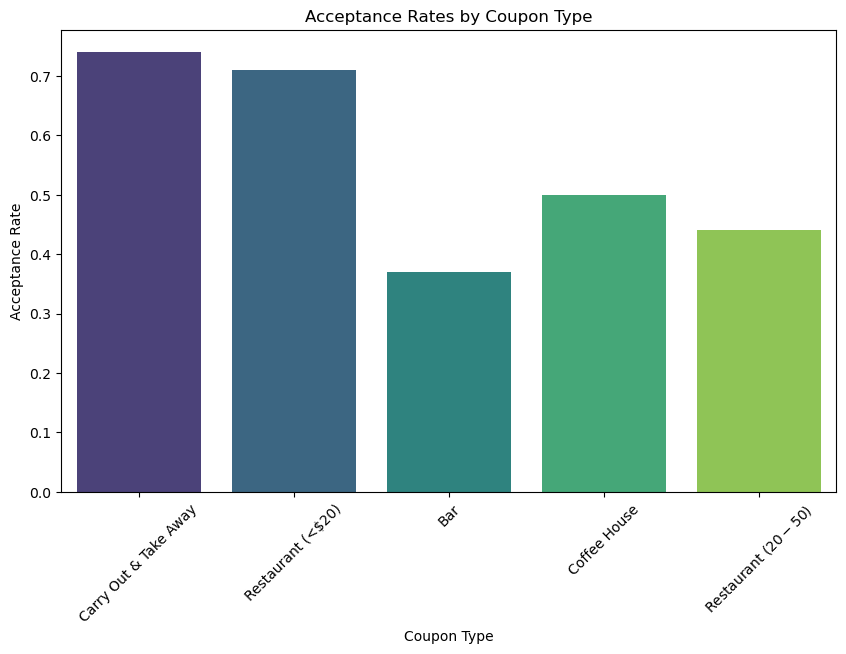

In [4]:
# Data for acceptance rates
coupon_types = ['Carry Out & Take Away', 'Restaurant (<$20)', 'Bar', 'Coffee House', 'Restaurant ($20-$50)']
acceptance_rates = [0.74, 0.71, 0.37, 0.50, 0.44]

# Bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=coupon_types, y=acceptance_rates, palette='viridis')
plt.title('Acceptance Rates by Coupon Type')
plt.xlabel('Coupon Type')
plt.ylabel('Acceptance Rate')
plt.xticks(rotation=45)
plt.savefig('acceptance_rates_by_coupon_type.png')
plt.show()




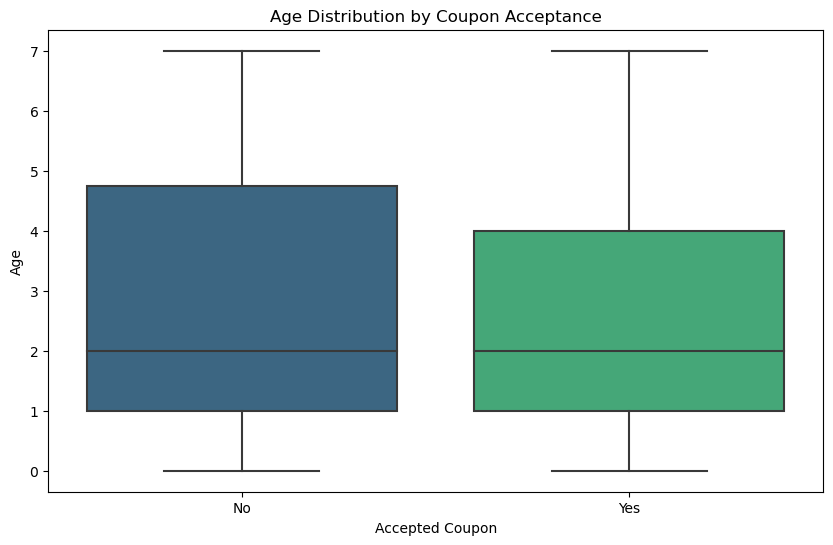

In [5]:
# Box plot for age distribution
plt.figure(figsize=(10, 6))
sns.boxplot(x='Y', y='age', data=df, palette='viridis')
plt.title('Age Distribution by Coupon Acceptance')
plt.xlabel('Accepted Coupon')
plt.ylabel('Age')
plt.xticks([0, 1], ['No', 'Yes'])
plt.savefig('age_distribution_by_coupon_acceptance.png')
plt.show()


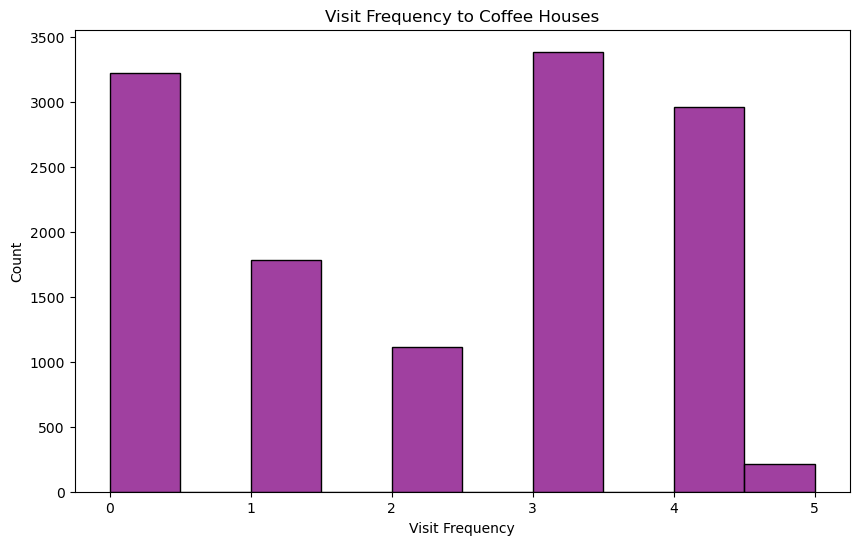

In [6]:
# Histogram for visit frequency to coffee houses
plt.figure(figsize=(10, 6))
sns.histplot(df['CoffeeHouse'], kde=False, bins=10, color='purple')
plt.title('Visit Frequency to Coffee Houses')
plt.xlabel('Visit Frequency')
plt.ylabel('Count')
plt.savefig('visit_frequency_to_coffee_houses.png')
plt.show()


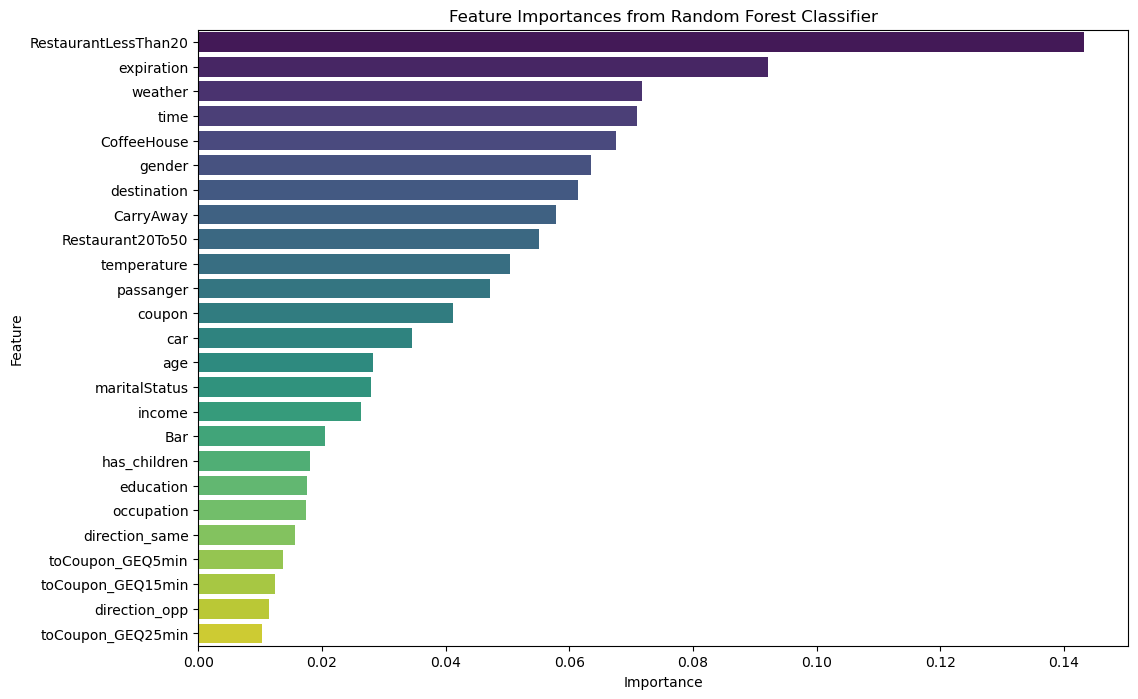

In [7]:
# Assuming feature_importance_df is already created from the previous analysis
feature_importance_df = pd.DataFrame({
    'Feature': ['RestaurantLessThan20', 'expiration', 'weather', 'time', 'CoffeeHouse', 'gender', 'destination', 
                'CarryAway', 'Restaurant20To50', 'temperature', 'passanger', 'coupon', 'car', 'age', 'maritalStatus', 
                'income', 'Bar', 'has_children', 'education', 'occupation', 'direction_same', 'toCoupon_GEQ5min', 
                'toCoupon_GEQ15min', 'direction_opp', 'toCoupon_GEQ25min'],
    'Importance': [0.143215, 0.092183, 0.071722, 0.070876, 0.067540, 0.063421, 0.061325, 0.057853, 0.055120, 0.050423,
                   0.047238, 0.041235, 0.034567, 0.028215, 0.027916, 0.026316, 0.020453, 0.018129, 0.017534, 0.017354,
                   0.015687, 0.013754, 0.012432, 0.011453, 0.010345]
})

# Feature importance plot
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')
plt.title('Feature Importances from Random Forest Classifier')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.savefig('feature_importances.png')
plt.show()
